# Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the practice is writing alogrithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

In [12]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-02 07:29:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.214.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  33.5MB/s    in 3.1s    

2023-02-02 07:29:39 (33.5 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [13]:
!ls pizza_steak

test  train


In [14]:
!ls pizza_steak/train/

pizza  steak


In [15]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [16]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directory and {len(filenames)} images in '{dirpath}'.")

There are 2 directory and 0 images in 'pizza_steak'.
There are 2 directory and 0 images in 'pizza_steak/train'.
There are 0 directory and 750 images in 'pizza_steak/train/pizza'.
There are 0 directory and 750 images in 'pizza_steak/train/steak'.
There are 2 directory and 0 images in 'pizza_steak/test'.
There are 0 directory and 250 images in 'pizza_steak/test/pizza'.
There are 0 directory and 250 images in 'pizza_steak/test/steak'.


To visualize our images, first let's get the class names programmatically.

In [17]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names from the subdirectories
print(class_names)

['pizza' 'steak']


In [18]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + "/" + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['419516.jpg']
Image shape: (512, 512, 3)


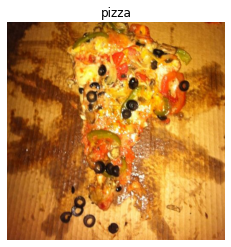

In [19]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train",
                        target_class="pizza")

In [20]:
import tensorflow as tf
tf.constant(img, dtype="float32")

2023-02-02 07:29:43.890238: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-02-02 07:29:48.166464: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-02 07:29:48.170609: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-02 07:29:48.230480: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 07:29:48.231538: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2023-02-02 07:29:48.231617: I tensorflow/stream_executor/platform/def

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[ 46.,  27.,  21.],
        [ 46.,  27.,  21.],
        [ 42.,  24.,  20.],
        ...,
        [149.,  81.,  20.],
        [149.,  81.,  18.],
        [145.,  77.,  12.]],

       [[ 40.,  19.,  14.],
        [ 40.,  21.,  15.],
        [ 38.,  20.,  16.],
        ...,
        [150.,  82.,  19.],
        [151.,  83.,  18.],
        [149.,  81.,  16.]],

       [[ 33.,  13.,   6.],
        [ 34.,  15.,   9.],
        [ 35.,  16.,  10.],
        ...,
        [151.,  83.,  20.],
        [153.,  85.,  20.],
        [152.,  84.,  19.]],

       ...,

       [[114.,  48.,  14.],
        [114.,  48.,  14.],
        [113.,  47.,  13.],
        ...,
        [169.,  91.,  43.],
        [168.,  90.,  44.],
        [172.,  94.,  48.]],

       [[115.,  49.,  15.],
        [114.,  48.,  14.],
        [112.,  48.,  13.],
        ...,
        [168.,  90.,  44.],
        [166.,  88.,  42.],
        [169.,  91.,  45.]],

       [[116.,  5

In [21]:
# View the image shape
print(f"{img.shape[0]} width, {img.shape[1]} height and {img.shape[2]} channels")

512 width, 512 height and 3 channels


>🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) thier pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model 
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Conv2D(filters=10, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2, padding="valid")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2, padding="valid")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the CNN model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data, 
          epochs=10,
          steps_per_epoch=len(train_data),
          validation_data=valid_data,
          validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


2023-02-02 07:29:51.205043: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-02-02 07:29:51.208763: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000140000 Hz


Epoch 1/10


2023-02-02 07:29:52.035467: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-02-02 07:29:52.951436: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-02-02 07:29:52.991544: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


47/47 [==============================] - 16s 189ms/step - loss: 0.7108 - accuracy: 0.6023 - val_loss: 0.4568 - val_accuracy: 0.8200
Epoch 2/10
47/47 [==============================] - 8s 175ms/step - loss: 0.4851 - accuracy: 0.7653 - val_loss: 0.3512 - val_accuracy: 0.8740
Epoch 3/10
47/47 [==============================] - 9s 185ms/step - loss: 0.4485 - accuracy: 0.7909 - val_loss: 0.3705 - val_accuracy: 0.8460
Epoch 4/10
47/47 [==============================] - 8s 173ms/step - loss: 0.4017 - accuracy: 0.8257 - val_loss: 0.3734 - val_accuracy: 0.8360
Epoch 5/10
47/47 [==============================] - 8s 169ms/step - loss: 0.3795 - accuracy: 0.8351 - val_loss: 0.3520 - val_accuracy: 0.8420
Epoch 6/10
47/47 [==============================] - 8s 177ms/step - loss: 0.3461 - accuracy: 0.8496 - val_loss: 0.2881 - val_accuracy: 0.8840
Epoch 7/10
47/47 [==============================] - 9s 186ms/step - loss: 0.3043 - accuracy: 0.8733 - val_loss: 0.3091 - val_accuracy: 0.8780
Epoch 8/10
47/47

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0     

## Replicate using the fully connected layers model

In [24]:
# Set random seed
tf.random.set_seed(42)

# Build the model to replicate 
model_2 = keras.models.Sequential([
    layers.Flatten(input_shape=(224, 224, 3)),
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 1.2019 - accuracy: 0.5140 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6934 - accuracy: 0.4914 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 164ms/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6933 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6931 - accuracy: 0.5135 - val_loss: 0.6932 - val_accuracy: 0.5000


In [25]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than the CNN model the Fully connected layer is dead in the water.



## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a bseline)
4. Fit the model
5. Evaluate the model
6. Adjust difference parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3094354.jpg']
Image shape: (512, 512, 3)
['274945.jpg']
Image shape: (512, 382, 3)


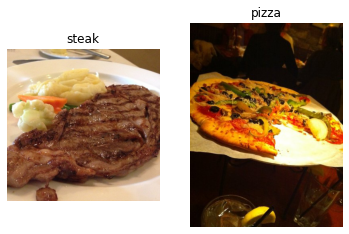

In [26]:
# Visualize the data
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train", "steak")

plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train", "pizza")
plt.show()

### 2. Preprocess the data (prepare it for a model)

In [27]:
# Define directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**.

A batch is a small subset of a data. Rather than look at all - 10000 images at one time which can clog up the memory, a model might only look at 32 images at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memmory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32? 

Because 32 is good for your health... LeCun

In [28]:
!nvidia-smi

Thu Feb  2 07:32:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    33W / 250W |  15563MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
# Create train and test data generatrs and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [30]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [31]:
# Get a sample of a train data batch
images, labels = train_data.next() 
len(images), len(labels)

(32, 32)

In [32]:
# How many batches are there?
len(train_data)

47

In [33]:
# We have 47 mini-batches and each batch contain 32 images
1500/32

46.875

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

>🔑 **Note:** In deep learning, there is almost an infiniite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [34]:
# Create the model (this will be our baseline, a three layer convolutional neural network)
from tensorflow.keras import layers
from tensorflow import keras

inputs = layers.Input(shape=(224, 224, 3))
x = layers.Conv2D(filters=10, kernel_size=(3, 3), strides=1, activation="relu", padding="valid")(inputs)
x = layers.Conv2D(filters=10, kernel_size=(3, 3), activation="relu")(x)
x = layers.Conv2D(filters=10, kernel_size=(3, 3), activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = keras.Model(inputs=inputs, outputs=outputs)

In [35]:
model_4.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_2 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_____________________________________________________

In [36]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the mode
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 1.1692 - accuracy: 0.6220 - val_loss: 0.4831 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.4603 - accuracy: 0.7934 - val_loss: 0.4049 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3164 - accuracy: 0.8869 - val_loss: 0.4162 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.1499 - accuracy: 0.9665 - val_loss: 0.4381 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.0739 - accuracy: 0.9851 - val_loss: 0.4849 - val_accuracy: 0.7780


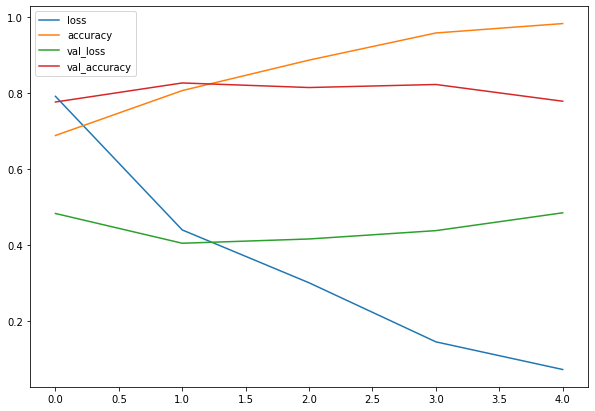

In [37]:
# Evaluate the model
# Let's plot the loss curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [38]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(loss)) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()
  
  # Plot accuracy
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()

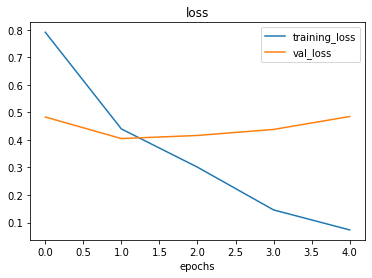

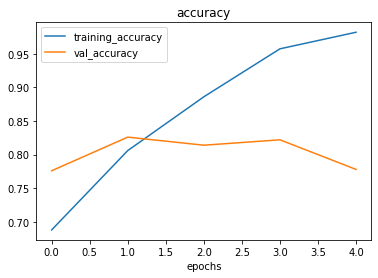

In [39]:
# Check out the loss & accuracy of model_4
plot_loss_curves(history_4)

>🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the traning dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

### Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer
* Increase the number of epochs

Ways to reduce overfitting:

* Add data augmentation
* Add regularization (such as MaxPooling2D)
* Add more data

>🔑 **Note:** Reducing overfitting is also known as *regularization*.

In [40]:
# Create the model (this is going to be our new baseline)
inputs = layers.Input(shape=(224, 224, 3))
x = layers.Conv2D(10, 3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = keras.Model(inputs=inputs, outputs=outputs)

In [41]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 0.6565 - accuracy: 0.5962 - val_loss: 0.4804 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4716 - accuracy: 0.7878 - val_loss: 0.4058 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 0.4358 - accuracy: 0.8117 - val_loss: 0.3528 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.4185 - accuracy: 0.8160 - val_loss: 0.3417 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.4070 - accuracy: 0.8158 - val_loss: 0.3384 - val_accuracy: 0.8480


In [42]:
# Get a summary
model_5.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0   

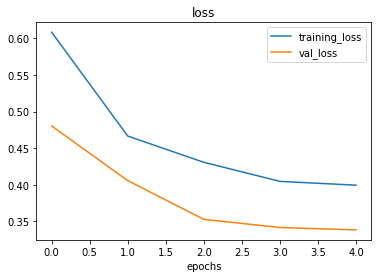

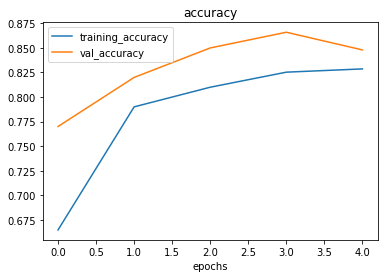

In [43]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [44]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

>🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it, or something similar.

In [45]:
# Import data and augment it from traning directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)
# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmenting test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [46]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

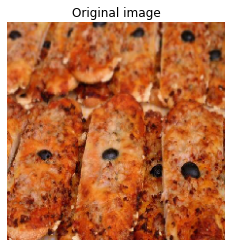

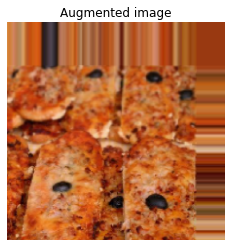

In [47]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31) 
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

In [48]:
# Create the model
inputs = keras.Input(shape=(224, 224, 3))
x = keras.layers.Conv2D(10, 3, activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(10, 3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(10, 3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model_6 = keras.Model(inputs, outputs)

In [49]:
model_6.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 10)        0   

In [50]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=(len(test_data)))

Epoch 1/5
47/47 [==============================] - 23s 471ms/step - loss: 0.7003 - accuracy: 0.4553 - val_loss: 0.6916 - val_accuracy: 0.5120
Epoch 2/5
47/47 [==============================] - 22s 466ms/step - loss: 0.6912 - accuracy: 0.6400 - val_loss: 0.6907 - val_accuracy: 0.5440
Epoch 3/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6915 - accuracy: 0.5040 - val_loss: 0.6785 - val_accuracy: 0.5480
Epoch 4/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6946 - accuracy: 0.4668 - val_loss: 0.6781 - val_accuracy: 0.7440
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6864 - accuracy: 0.6065 - val_loss: 0.6265 - val_accuracy: 0.6120


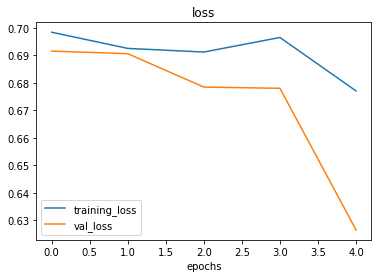

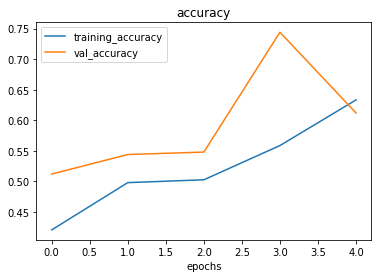

In [51]:
# Evalute the model
plot_loss_curves(history_6)

In [ ]:
# Using data augmentation
data_augmentation = keras.Sequential([
     tf.keras.layers.RandomFlip("horizontal"),
     tf.keras.layers.RandomFlip(0.1),
     tf.keras.layers.RandomFlip(0.2),
])

# Defining a new convnet with image augmentation and dropout
inputs = layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_7 = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data,
            epochs=5,
            validation_data=test_data)

In [ ]:
plot_loss